In [2]:
import tensorflow as tf 
from tensorflow import keras
import numpy as np
from tensorflow.keras.layers  import Input,Dense,Flatten,Conv2D,MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))


Num GPUs Available:  1


In [3]:
datagen=ImageDataGenerator(validation_split=0.2,rescale=1./255,fill_mode='nearest')
path='C:\\Users\\PC\\Desktop\\k'
train=datagen.flow_from_directory(path,target_size=(224,224),batch_size=32,class_mode='binary',shuffle=True,subset='training')
test=datagen.flow_from_directory(path,target_size=(224,224),batch_size=32,class_mode='binary',shuffle=True,subset='validation')


Found 1266 images belonging to 2 classes.
Found 316 images belonging to 2 classes.


In [4]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())
tf.debugging.set_log_device_placement(True)

try:
  # Specify an invalid GPU device
  with tf.device('/device:GPU:2'):
    a = tf.constant([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
    b = tf.constant([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])
    c = tf.matmul(a, b)
except RuntimeError as e:
    print(e)


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 4258198523138078601
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 3073848115
locality {
  bus_id: 1
  links {
  }
}
incarnation: 4527737058645549021
physical_device_desc: "device: 0, name: GeForce GTX 1650, pci bus id: 0000:01:00.0, compute capability: 7.5"
]


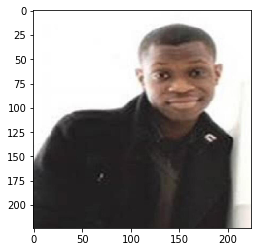

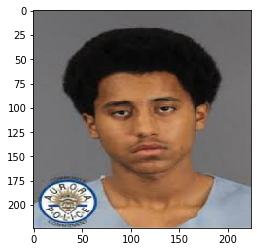

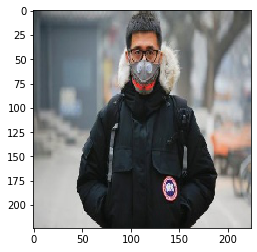

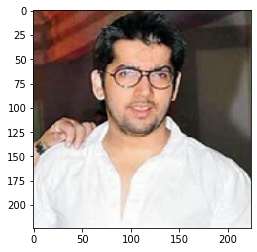

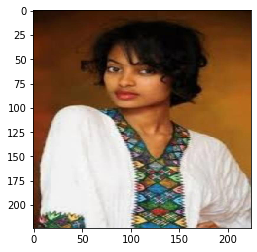

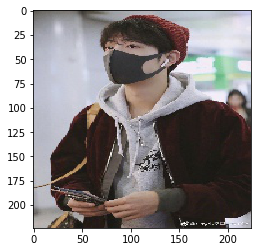

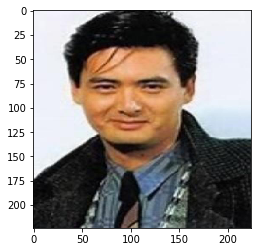

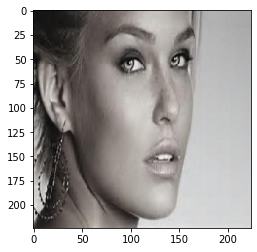

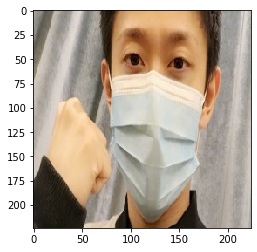

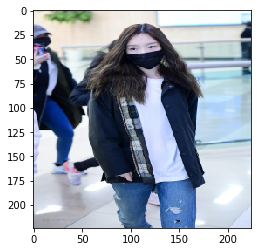

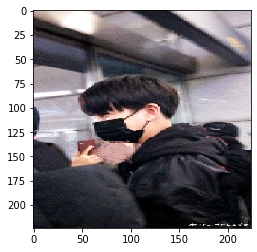

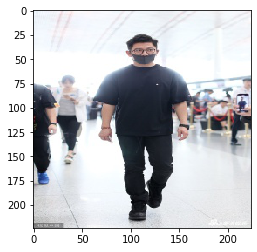

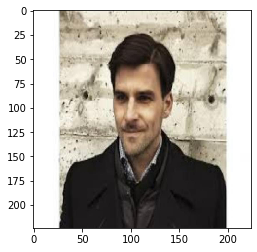

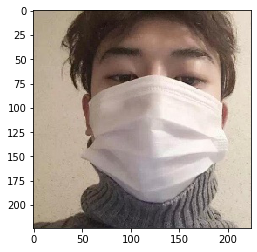

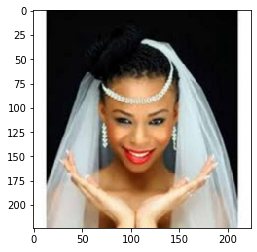

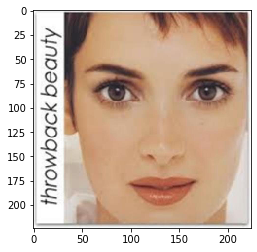

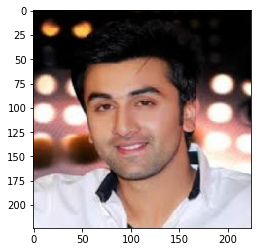

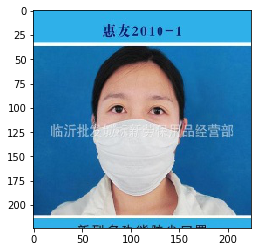

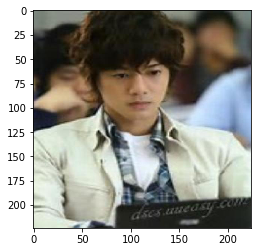

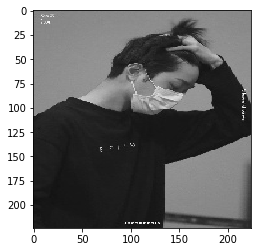

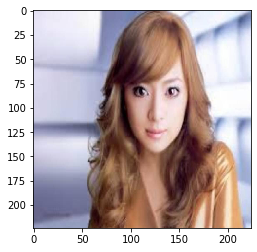

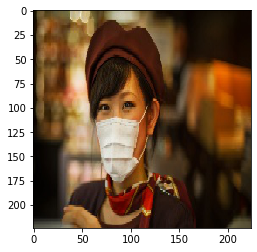

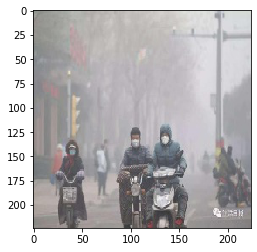

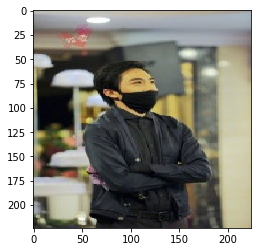

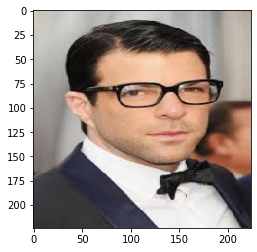

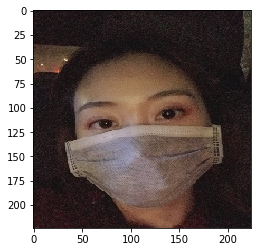

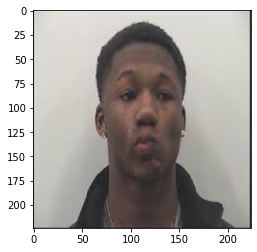

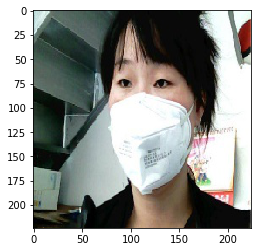

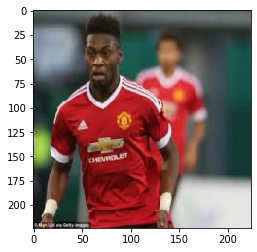

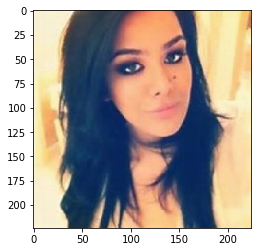

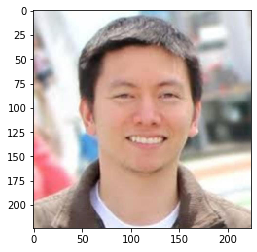

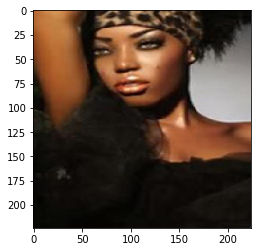

In [28]:
X_batch,y_batch=next(train)
for i in range(0,32):
    image=X_batch[i]
    plt.imshow(image)
    plt.show()

In [31]:
with tf.device('/device:GPU:2'):
    base_model = keras.applications.Xception(
    weights="imagenet", 
    input_shape=(224, 224, 3),
    include_top=False,)
    base_model.trainable = False
    image_inputs=Input(shape=(224,224,3))
    x = base_model(image_inputs, training=False)
    Next_L1=Conv2D(45,kernel_size=4,activation='relu')(x)
    Next_L2=MaxPooling2D(pool_size=(2,2))(Next_L1)
    Next_L3=Flatten()(Next_L2)
    Next_L4=Dense(32,'relu')(Next_L3)
    Next_L5=Dense(1,'sigmoid')(Next_L4)
model_face=Model(inputs=image_inputs,outputs=Next_L5)
print(model.summary())
model_face.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
xception (Model)             (None, 7, 7, 2048)        20861480  
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 4, 4, 45)          1474605   
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 2, 2, 45)          0         
_________________________________________________________________
flatten (Flatten)            (None, 180)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                5792      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33    

In [33]:
model_face.fit_generator(train,epochs=10,validation_data=test)

Epoch 1/10
40/40 [==============================] - 18s 445ms/step - loss: 0.1999 - acc: 0.9305 - val_loss: 0.0685 - val_acc: 0.9747
Epoch 2/10
40/40 [==============================] - 12s 311ms/step - loss: 0.0274 - acc: 0.9913 - val_loss: 0.0907 - val_acc: 0.9778
Epoch 3/10
40/40 [==============================] - 13s 314ms/step - loss: 0.0219 - acc: 0.9913 - val_loss: 0.0952 - val_acc: 0.9715
Epoch 4/10
40/40 [==============================] - 12s 312ms/step - loss: 0.0049 - acc: 0.9984 - val_loss: 0.0333 - val_acc: 0.9842
Epoch 5/10
40/40 [==============================] - 13s 315ms/step - loss: 7.4230e-04 - acc: 1.0000 - val_loss: 0.0359 - val_acc: 0.9905
Epoch 6/10
40/40 [==============================] - 13s 315ms/step - loss: 7.8592e-05 - acc: 1.0000 - val_loss: 0.0381 - val_acc: 0.9873
Epoch 7/10
40/40 [==============================] - 13s 315ms/step - loss: 5.5677e-05 - acc: 1.0000 - val_loss: 0.0387 - val_acc: 0.9873
Epoch 8/10
40/40 [==============================] - 13s 3

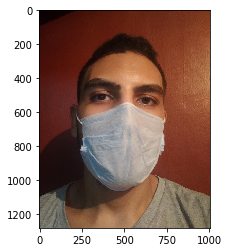

In [5]:
from skimage.transform import  resize

imagewithmask = plt.imread('C:\\Users\\PC\\Downloads/mask.jpeg')/255
image_resized1 = resize(imagewithmask, (224, 224),
                       anti_aliasing=True)
imagewithNOmask = plt.imread('C:\\Users\\PC\\Downloads/nomask.jpeg')/255
image_resized2 = resize(imagewithNOmask, (224, 224),
                       anti_aliasing=True)
plt.imshow(imagewithmask)
plt.show()
list=[]
list.append(image_resized1)
list2=[]
list2.append(image_resized2)
image_with_mask=np.stack(list)
image_with_mask.shape
image2_without_mask=np.stack(list2)


(1, 224, 224, 3)

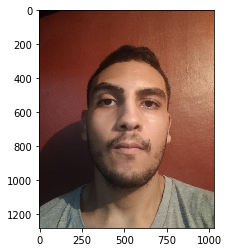

In [6]:
plt.imshow(imagewithNOmask)
image2_without_mask.shape


In [7]:
def auth(m):
    pred=model_face.predict(m)
    if pred==0:
        print("welcome")
    else: print("unauthorized")    

In [46]:
auth(image_with_mask)

welcome


In [47]:
auth(image2_without_mask)

unauthorized


In [58]:
model_face.save('D:\\New folder\\my_model.h5') 

In [9]:
loaded = keras.models.load_model("D:\\New folder\\my_model.h5")

In [10]:
def auth_saved_Model(m):
    pred=loaded.predict(m)
    if pred==0:
        print("welcome")
    else: print("unauthorized")   

In [11]:
auth_saved_Model(image_with_mask)

welcome


In [12]:
auth_saved_Model(image2_without_mask)

unauthorized


In [13]:

datagen2=ImageDataGenerator(rescale=1./255,fill_mode='nearest')
test2=datagen2.flow_from_directory('C:\\Users\\PC\\Desktop\\test',target_size=(224,224),batch_size=32,class_mode='binary',shuffle=False)


Found 500 images belonging to 2 classes.


In [14]:
loaded.evaluate_generator(test2)

[0.1526486928299846, 0.968]